<a href="https://colab.research.google.com/github/Ganesh7134/Guvi_final_project/blob/main/guvi_ratings_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/guvi_courses.csv")
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [ ]:
df.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
df.shape

(3680, 12)

In [ ]:
df.isnull().sum()

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
len(df)

3676

In [ ]:
df.isna().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [ ]:
df["level"].unique()

array(['Beginner Level', 'Expert Level', 'All Levels',
       'Intermediate Level'], dtype=object)

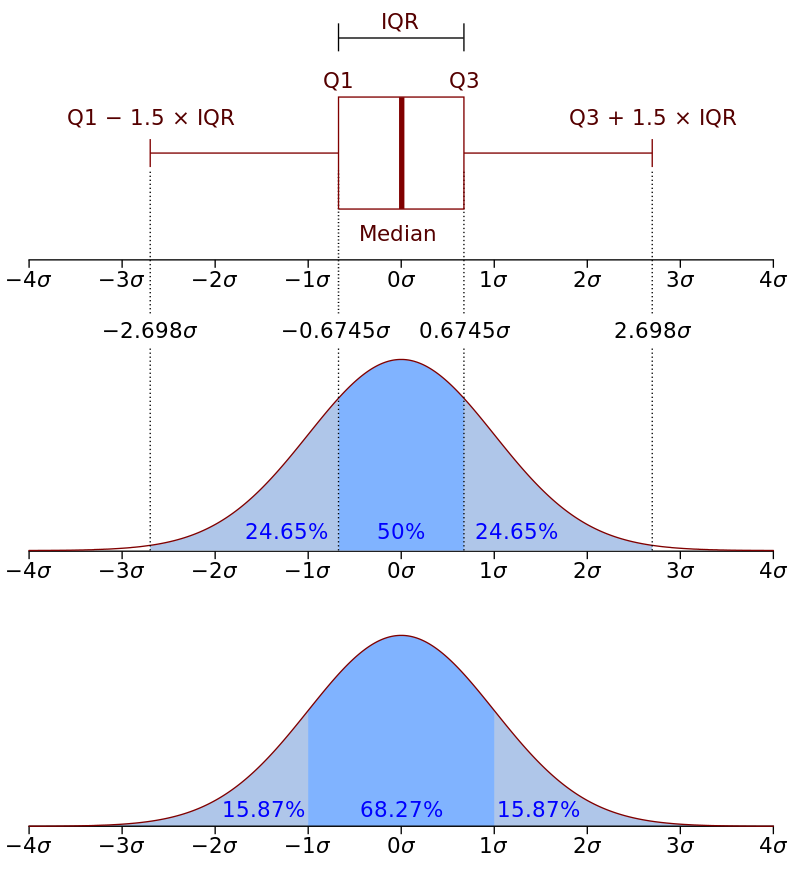

In [ ]:
import numpy as np

# Calculate IQR for numerical columns and store them in a dictionary
iqr_values = {}
num = df.select_dtypes(np.number)
num_columns = num.columns
for col in num_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_values[col] = q3 - q1

def treat_outliers_IQR(df):
    # Use the stored IQR values to identify outliers
    num = df.select_dtypes(np.number)
    num_columns = num.columns
    for col in num_columns:
        lower_bound = q1 - 1.5 * iqr_values[col]
        upper_bound = q3 + 1.5 * iqr_values[col]
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        return outliers

In [ ]:
treat_outliers_IQR(df)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
34,949282.0,Learn Angular 2 from Beginner to Advanced,https://www.udemy.com/learn-angular-2-from-beg...,195.0,32696.0,526.0,67.0,Beginner Level,0.70,10.000000,2016-10-07T00:25:59Z,Subject: Web Development
40,866460.0,Angular 2+ with Typescript - Essential Training,https://www.udemy.com/angular-2-training/,195.0,29348.0,780.0,66.0,Beginner Level,0.31,3.000000,2016-11-29T04:08:03Z,Subject: Web Development
42,1025026.0,Javascript - From Beginner to Pro-Build real w...,https://www.udemy.com/javascript-from-beginner...,195.0,28694.0,688.0,77.0,All Levels,0.05,11.500000,2016-12-11T21:16:42Z,Subject: Web Development
44,851712.0,The Complete JavaScript Course: Build a Real-W...,https://www.udemy.com/the-complete-javascript-...,195.0,27801.0,4340.0,113.0,Beginner Level,0.21,17.500000,2016-10-14T22:52:23Z,Subject: Web Development
57,882488.0,WordPress Development For Beginners,https://www.udemy.com/wordpress-basic/,95.0,23572.0,210.0,20.0,All Levels,0.71,2.000000,2016-06-20T18:46:15Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments


In [ ]:
df["Rating_percent"] = (df["Rating"] * 100).astype("int")

In [ ]:
numeric = df.select_dtypes(np.number)
numeric

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration,Rating_percent
0,41295.0,0.0,268923.0,8629.0,45.0,0.82,10.500000,82
1,59014.0,0.0,161029.0,279.0,27.0,0.69,3.500000,69
2,625204.0,200.0,121584.0,27445.0,342.0,0.89,43.000000,89
3,173548.0,0.0,120291.0,5924.0,30.0,0.78,3.000000,78
4,764164.0,200.0,114512.0,22412.0,304.0,0.55,30.500000,55
...,...,...,...,...,...,...,...,...
3675,1216340.0,20.0,0.0,0.0,23.0,0.31,1.500000,31
3676,1026762.0,125.0,0.0,0.0,7.0,0.06,0.633333,6
3677,1223240.0,20.0,0.0,0.0,6.0,0.08,0.533333,8
3678,1224186.0,35.0,0.0,0.0,13.0,0.78,0.516667,78


In [ ]:
import warnings

warnings.filterwarnings("ignore")

## **Plotting Skewness Using distplot**

course_id
-0.15257547629192017


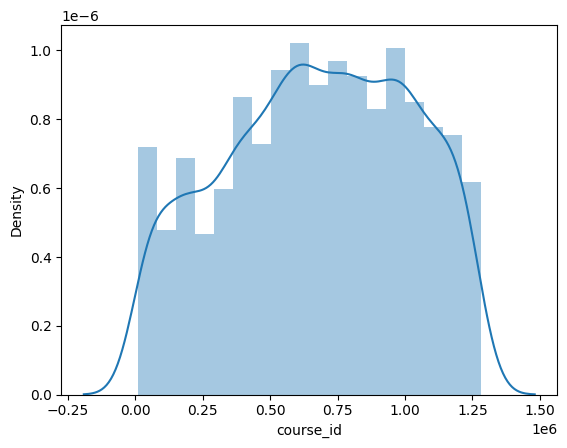

price
1.155783137006714


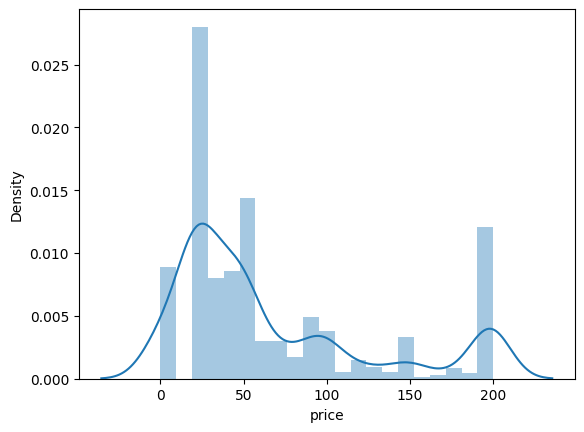

num_subscribers
11.586605703621457


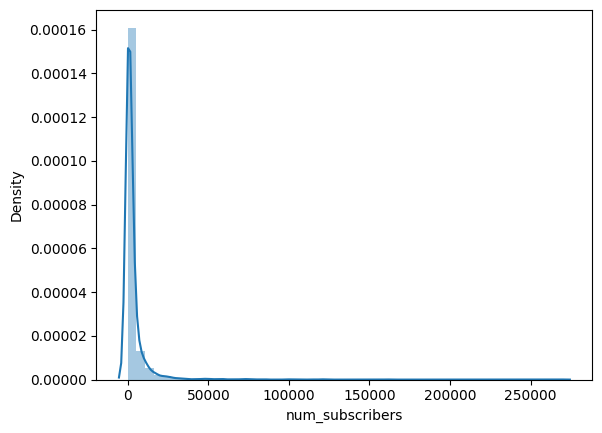

num_reviews
17.806098635046634


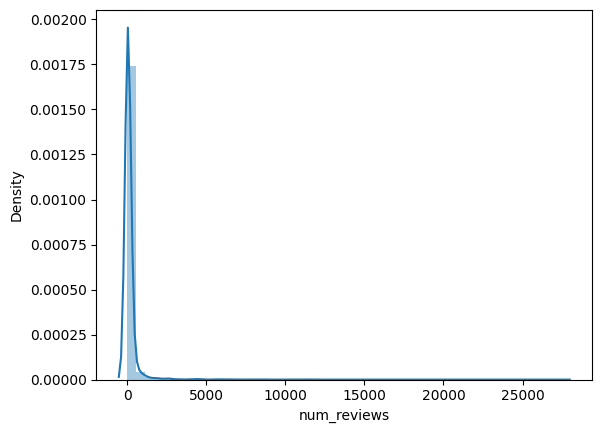

num_lectures
4.868847537617606


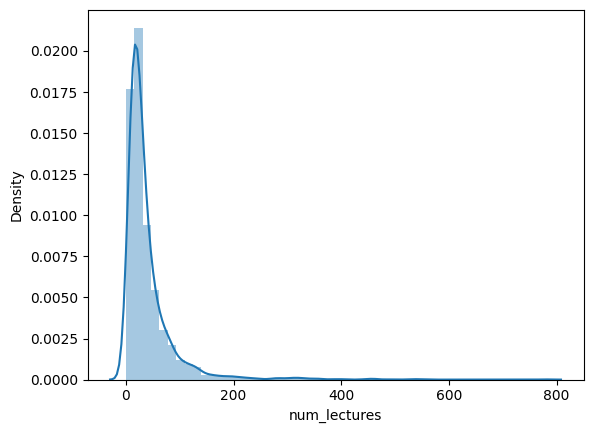

Rating
-0.46748321681301097


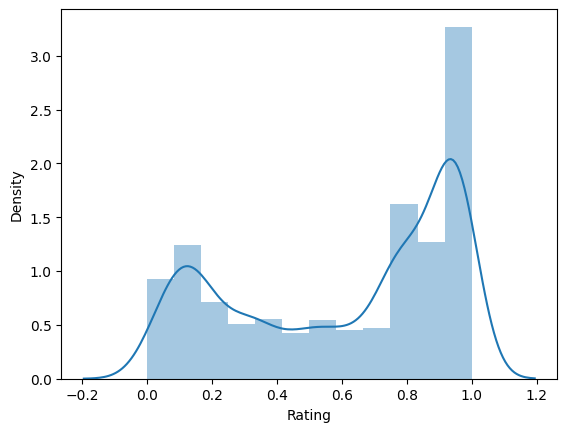

content_duration
5.425088531600569


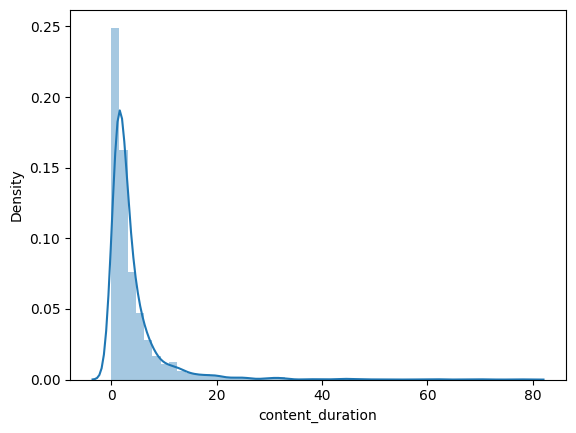

Rating_percent
-0.46652166412431817


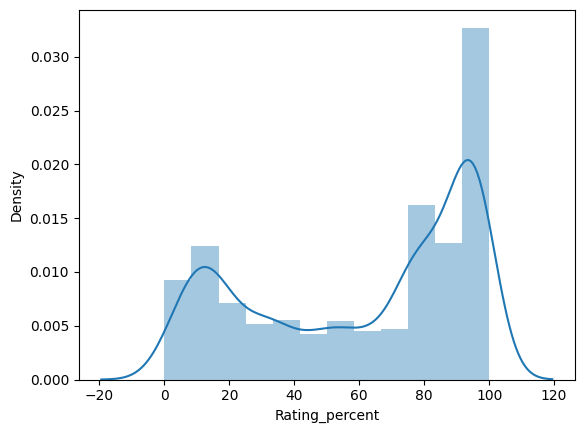

In [ ]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt

for i in numeric.columns:
  print(i)
  print(skew(numeric[i]))
  plt.figure()
  sns.distplot(numeric[i])
  plt.show()

In [ ]:
import numpy as np
mask1 = df["price"] <= 0
print(mask1.sum())
df.loc[mask1, 'price'] = np.nan # just replace those negative values and 0 with Nan

mask2 = df["num_subscribers"] <= 0
print(mask2.sum())
df.loc[mask2, 'num_subscribers'] = np.nan # just replace those negative values with Nan

mask3 = df["num_reviews"] <= 0
print(mask3.sum())
df.loc[mask3, 'num_reviews'] = np.nan # just replace those negative values with Nan

mask4 = df["num_lectures"] <= 0
print(mask4.sum())
df.loc[mask4, 'num_lectures'] = np.nan # just replace those negative values with Nan

mask5 = df["content_duration"] <= 0
print(mask5.sum())
df.loc[mask5, 'content_duration'] = np.nan # just replace those negative values with Nan

mask6 = df["Rating_percent"] <= 0
print(mask6.sum())
df.loc[mask6, 'Rating_percent'] = np.nan # just replace those negative values with Nan

311
65
284
1
1
18


In [ ]:
df.isna().sum()

course_id                0
course_title             0
url                      0
price                  311
num_subscribers         65
num_reviews            284
num_lectures             1
level                    0
Rating                   0
content_duration         1
published_timestamp      0
subject                  0
Rating_percent          18
dtype: int64

In [ ]:
df["price"].head(100)

0       NaN
1       NaN
2     200.0
3       NaN
4     200.0
      ...  
95     50.0
96     60.0
97     75.0
98     75.0
99      NaN
Name: price, Length: 100, dtype: float64

In [ ]:
int(df["price"].mean())

72

In [ ]:
df["price"].fillna(int(df["price"].mean()),inplace=True)

In [ ]:
df.isna().sum()

course_id                0
course_title             0
url                      0
price                    0
num_subscribers         65
num_reviews            284
num_lectures             1
level                    0
Rating                   0
content_duration         1
published_timestamp      0
subject                  0
Rating_percent          18
dtype: int64

In [ ]:
df["num_subscribers"].dtype

dtype('float64')

In [ ]:
int(df["num_subscribers"].mean())

3256

In [ ]:
df["num_subscribers"].fillna(int(df["num_subscribers"].mean()),inplace=True)

In [ ]:
df.isnull().sum()

course_id                0
course_title             0
url                      0
price                    0
num_subscribers          0
num_reviews            284
num_lectures             1
level                    0
Rating                   0
content_duration         1
published_timestamp      0
subject                  0
Rating_percent          18
dtype: int64

In [ ]:
df["num_reviews"].dtype

dtype('float64')

In [ ]:
int(df["num_reviews"].mean())

169

In [ ]:
df["num_reviews"].fillna(int(df["num_reviews"].mean()),inplace=True)

In [ ]:
df.isnull().sum()

course_id               0
course_title            0
url                     0
price                   0
num_subscribers         0
num_reviews             0
num_lectures            1
level                   0
Rating                  0
content_duration        1
published_timestamp     0
subject                 0
Rating_percent         18
dtype: int64

In [ ]:
int(df["Rating_percent"].mean())

61

In [ ]:
df["Rating_percent"].dtype

dtype('float64')

In [ ]:
df["Rating_percent"].fillna(int(df["Rating_percent"].mean()),inplace=True)

In [ ]:
df[df["Rating_percent"] == int(df["Rating_percent"].mean())]

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,Rating_percent,price_log,num_subscribers_log,num_reviews_log,num_lectures_log,content_duration_log
13,11174.0,Become a Web Developer from Scratch,https://www.udemy.com/how-to-become-a-web-deve...,120.0,69186.0,2408.0,197.0,All Levels,0.61,27.500000,2011-11-19T21:51:20Z,Subject: Web Development,61.0,4.787492,11.144554,7.786552,5.283204,3.314186
22,94432.0,Learn PHP Fundamentals From Scratch,https://www.udemy.com/learn-php-fundamentals-f...,72.0,48650.0,1236.0,9.0,All Levels,0.00,2.000000,2013-10-16T08:12:40Z,Subject: Web Development,61.0,4.276666,10.792407,7.119636,2.197225,0.693147
95,983534.0,Try AngularJS: Beginner's Guide to Front End W...,https://www.udemy.com/try-angularjs/,50.0,16926.0,126.0,33.0,Beginner Level,0.61,4.500000,2016-10-13T20:38:03Z,Subject: Web Development,61.0,3.912023,9.736606,4.836282,3.496508,1.504077
276,92760.0,Crash Course: Fundamentals Of HTML & CSS From ...,https://www.udemy.com/beginner-crash-course-fu...,20.0,7368.0,216.0,52.0,All Levels,0.61,2.000000,2013-09-20T19:48:56Z,Subject: Web Development,61.0,2.995732,8.904902,5.375278,3.951244,0.693147
290,1217948.0,Learn How To Become a Web Developer From Scratch,https://www.udemy.com/learn-how-to-become-a-fr...,200.0,7062.0,72.0,172.0,Beginner Level,0.61,11.000000,2017-05-28T19:38:52Z,Subject: Web Development,61.0,5.298317,8.862484,4.276666,5.147494,2.397895
324,73080.0,Step-by-step HTML and CSS for Absolute Beginners,https://www.udemy.com/step-by-step-html-and-cs...,120.0,6162.0,324.0,43.0,Expert Level,0.00,4.000000,2013-08-26T19:10:57Z,Subject: Web Development,61.0,4.787492,8.726157,5.780744,3.761200,1.386294
325,477702.0,Python for Beginners: Python Programming Langu...,https://www.udemy.com/python-course/,150.0,6153.0,125.0,84.0,All Levels,0.00,5.000000,2015-06-14T18:18:57Z,Subject: Web Development,61.0,5.010635,8.724695,4.828314,4.430817,1.609438
338,98140.0,Introduction to Bootstrap 3,https://www.udemy.com/introduction-to-bootstra...,20.0,5795.0,79.0,29.0,All Levels,0.00,2.500000,2013-09-27T03:11:22Z,Subject: Web Development,61.0,2.995732,8.664751,4.369448,3.367296,0.916291
502,1121650.0,Angular 2 Routing: Up And Running,https://www.udemy.com/angular-2-routing-up-and...,72.0,3357.0,84.0,13.0,All Levels,0.61,0.616667,2017-02-21T23:34:56Z,Subject: Web Development,61.0,4.276666,8.118803,4.430817,2.564949,-0.483427
576,637974.0,Master ExpressJS to Build Web Apps with NodeJS...,https://www.udemy.com/expressjs/,50.0,2643.0,56.0,24.0,All Levels,0.61,3.500000,2016-01-07T02:04:55Z,Subject: Web Development,61.0,3.912023,7.879670,4.025352,3.178054,1.252763


In [ ]:
df.isna().sum()

course_id               0
course_title            0
url                     0
price                   0
num_subscribers         0
num_reviews             0
num_lectures            1
level                   0
Rating                  0
content_duration        1
published_timestamp     0
subject                 0
Rating_percent          0
price_log               0
num_subscribers_log     0
num_reviews_log         0
num_lectures_log        1
content_duration_log    1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
len(df)

3675

<Axes: xlabel='Rating_percent'>

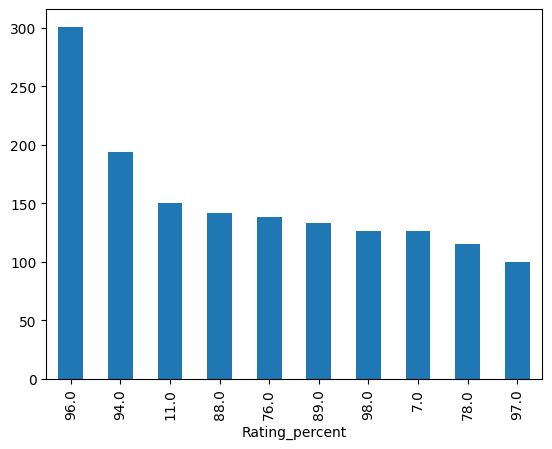

In [ ]:
df["Rating_percent"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")

In [ ]:
df["Rating_percent"].isna().sum()

0

## **Applying logarithmic transformation**

0.24634344048582826


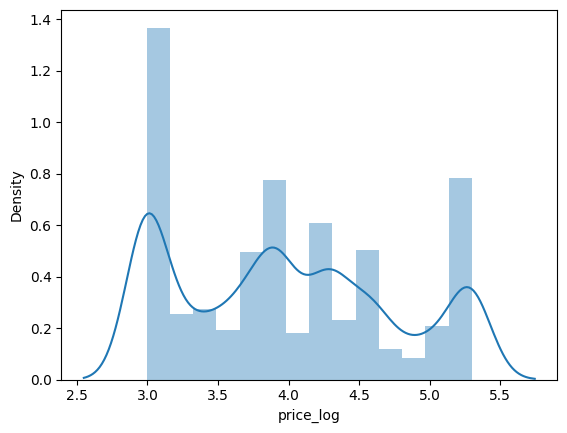

-0.649474660170045


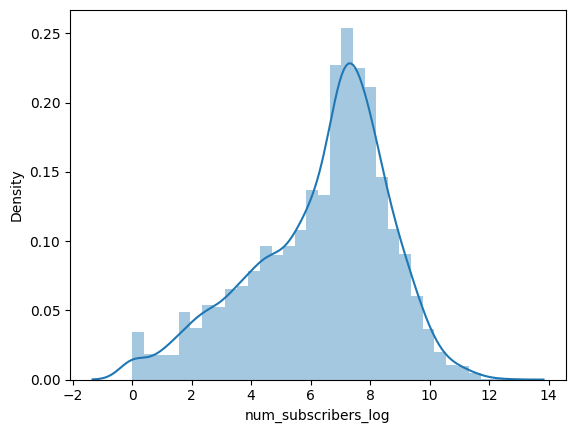

0.20737704265681317


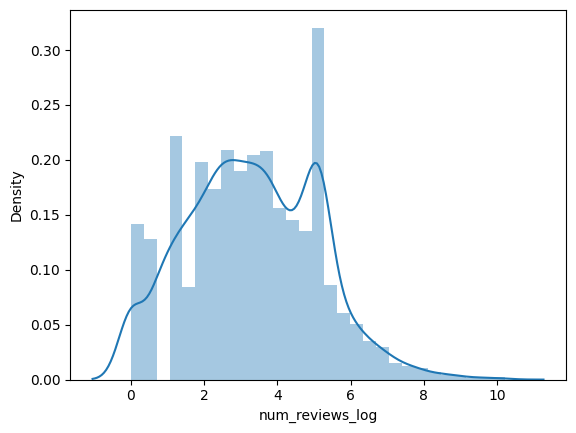

0.4569948736759984


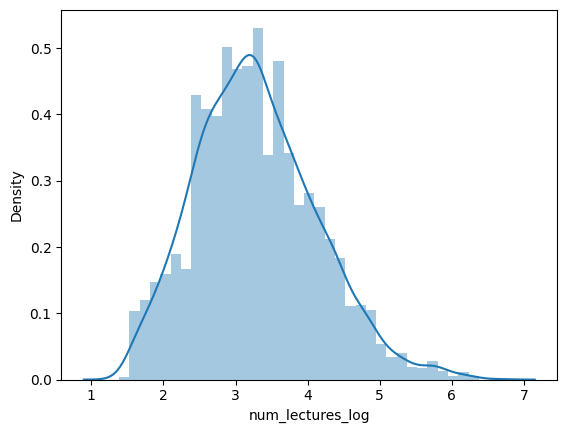

0.5793057057268257


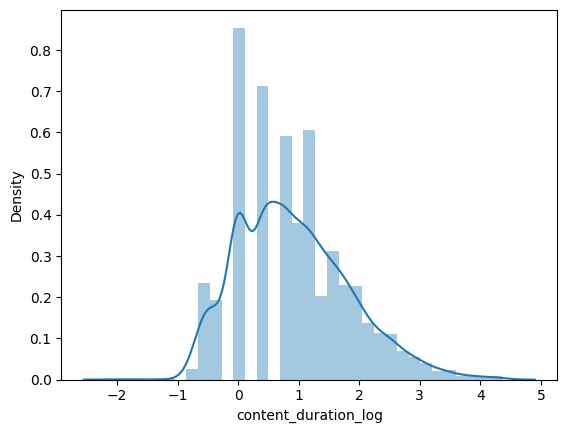

In [ ]:
# price
# num_subscribers
# num_reviews
# num_lectures
# content_duration

df["price_log"] = np.log(df["price"])
sns.distplot(df["price_log"])
print(skew(df["price_log"]))
plt.show()

df["num_subscribers_log"] = np.log(df["num_subscribers"])
sns.distplot(df["num_subscribers_log"])
print(skew(df["num_subscribers_log"]))
plt.show()

df["num_reviews_log"] = np.log(df["num_reviews"])
sns.distplot(df["num_reviews_log"])
print(skew(df["num_reviews_log"]))
plt.show()

df["num_lectures_log"] = np.log(df["num_lectures"])
sns.distplot(df["num_lectures_log"])
print(skew(df["num_lectures_log"]))
plt.show()

df["content_duration_log"] = np.log(df["content_duration"])
sns.distplot(df["content_duration_log"])
print(skew(df["content_duration_log"]))
plt.show()

In [ ]:
 df.select_dtypes("object").columns

Index(['course_title', 'url', 'level', 'published_timestamp', 'subject'], dtype='object')

# **Finding correlation of categorical variables using spearman's correlation coefficient**

**Spearman's Correlation Coefficient**:

Measures the strength and direction of the monotonic relationship between two variables, even if it's not linear.

**Ranges from -1 to +1**:

* **-1**: Perfect negative correlation (as one variable increases, the other decreases perfectly).
* **0**: No correlation (no relationship between the variables).
* **+1**: Perfect positive correlation (as one variable increases, the other increases perfectly).

>In your case, -0.0198 indicates a very weak negative correlation, meaning there's a slight tendency for Rating to decrease as level increases, but it's not a strong relationship.

Image of Spearman correlation coefficient scaleOpens in a new window

**Spearman correlation coefficient scale**

**p-value**:

Probability of observing a correlation coefficient as extreme or more extreme than the one calculated, **assuming there's no true correlation in the population**.

* A common significance threshold is 0.05. **If p-value is below 0.05, we reject the null hypothesis of no correlation** and conclude there's a statistically significant correlation.

* In your case, 0.2299 is higher than 0.05, **so we cannot reject the null hypothesis. We don't have enough evidence to conclude there's a statistically significant correlation between *level* and *Rating***

In [ ]:
from scipy.stats import spearmanr

spearmanr(df["level"], df["Rating"])

SignificanceResult(statistic=-0.020078477402675692, pvalue=0.2235786263816968)

In [ ]:
spearmanr(df["course_title"], df["Rating"])

SignificanceResult(statistic=0.008320340043766913, pvalue=0.6140508642521143)

In [ ]:
spearmanr(df["subject"], df["Rating"])

SignificanceResult(statistic=-0.1318560907284704, pvalue=1.0005847484814606e-15)

# **Finding continuous variable correlation using corr() function**

In [ ]:
x = df[["course_id","price_log","num_subscribers_log", "num_reviews_log" , "num_lectures_log" ,"content_duration_log","Rating_percent"]].corr()

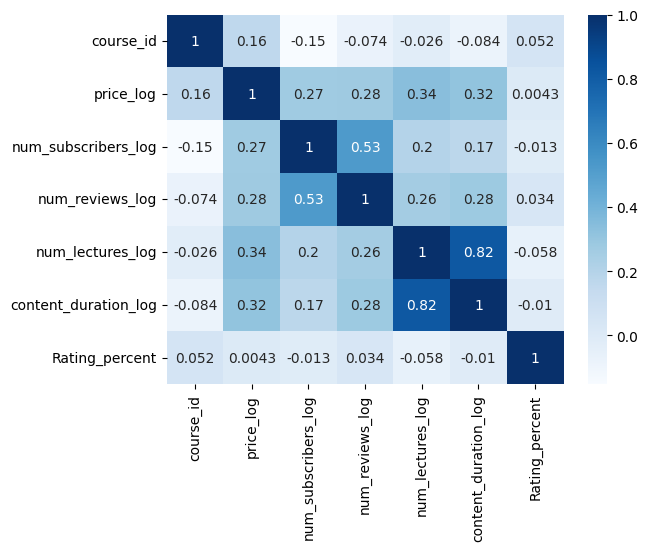

In [ ]:
sns.heatmap(x,annot=True,cmap="Blues")
plt.show()

In [ ]:
X = df.loc[:,["price_log","num_subscribers_log", "num_reviews_log" , "num_lectures_log" ,"content_duration_log","level","course_title","subject"]]
Y = df.loc[:,["Rating_percent"]]

In [ ]:
len(df["course_title"].unique())

3662

## **Applying Machine learning Model**

In [ ]:
# RandomForestRegressor(n_jobs=-1, random_state=3926)
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.metrics import mean_squared_error , r2_score
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

X = df.loc[:,["price_log","num_subscribers_log", "num_reviews_log" , "num_lectures_log" ,"content_duration_log","level","course_title","subject"]]
Y = df.loc[:,["Rating"]]

encoder = OneHotEncoder(handle_unknown="ignore")
level_ohe = encoder.fit_transform(X[["level"]]).toarray()

Ohe1 = OneHotEncoder(handle_unknown="ignore")
course_title_ohe = Ohe1.fit_transform(X[["course_title"]]).toarray()

Ohe2 = OneHotEncoder(handle_unknown="ignore")
subject_ohe = Ohe2.fit_transform(X[["subject"]]).toarray()

X = np.concatenate((X[["price_log","num_subscribers_log", "num_reviews_log" , "num_lectures_log" ,"content_duration_log"]].values,level_ohe , course_title_ohe, subject_ohe), axis=1)
ss = StandardScaler()
ss.fit_transform(X)

#train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 1)

rfr = RandomForestRegressor(random_state=42)

rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

r2 = r2_score(y_test,y_pred)

print("R2-score: ",r2)

mse = mean_squared_error(y_test,y_pred)

print("mean-squared-error: ",mse)



R2-score:  0.304738240444301
mean-squared-error:  0.0809638853671655


In [ ]:
from sklearn.linear_model import Ridge

rid = Ridge(random_state=939)

rid.fit(x_train,y_train)

y_pred = rid.predict(x_test)

print(r2_score(y_test,y_pred))

0.1790362143611709
